In [312]:
## • Read the CSV file
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats


In [280]:
data = pd.read_csv("/Users/Shiva/Desktop/python/Projects/project2/DS+-+Part3+-+CompanyX_EU.csv")
data.head()


,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating


In [281]:
#Check the datatypes of each attribute.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


In [282]:
#Check for null values in the attributes
data.isna().sum()



Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64

In [283]:
#Drop the null values.
data_modified = data.dropna()
data_modified.isna().sum()


Startup           0
Product           0
Funding           0
Event             0
Result            0
OperatingState    0
dtype: int64

In [284]:
data_modified['Funding']

1       $630K
3         $1M
5      $19.3M
6        $29M
10      $1.8M
        ...  
657       $8M
658       $1M
659     $223M
660     $3.4M
661    $31.5M
Name: Funding, Length: 446, dtype: object

In [286]:
#Convert the ‘Funding’ features to a numerical value.


def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0


data_modified['Funding'] = data_modified['Funding'].str.replace('$', '')
data_modified['Funding'] = data_modified['Funding'].apply(value_to_float)
data_modified['Funding']

<ipython-input-286-600a152a3d09>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modified['Funding'] = data_modified['Funding'].str.replace('$', '')
<ipython-input-286-600a152a3d09>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modified['Funding'] = data_modified['Funding'].apply(value_to_float)


1         630000.0
3        1000000.0
5       19300000.0
6       29000000.0
10       1800000.0
          ...     
657      8000000.0
658      1000000.0
659    223000000.0
660      3400000.0
661     31500000.0
Name: Funding, Length: 446, dtype: float64

Text(0, 0.5, 'Funding in Millions')

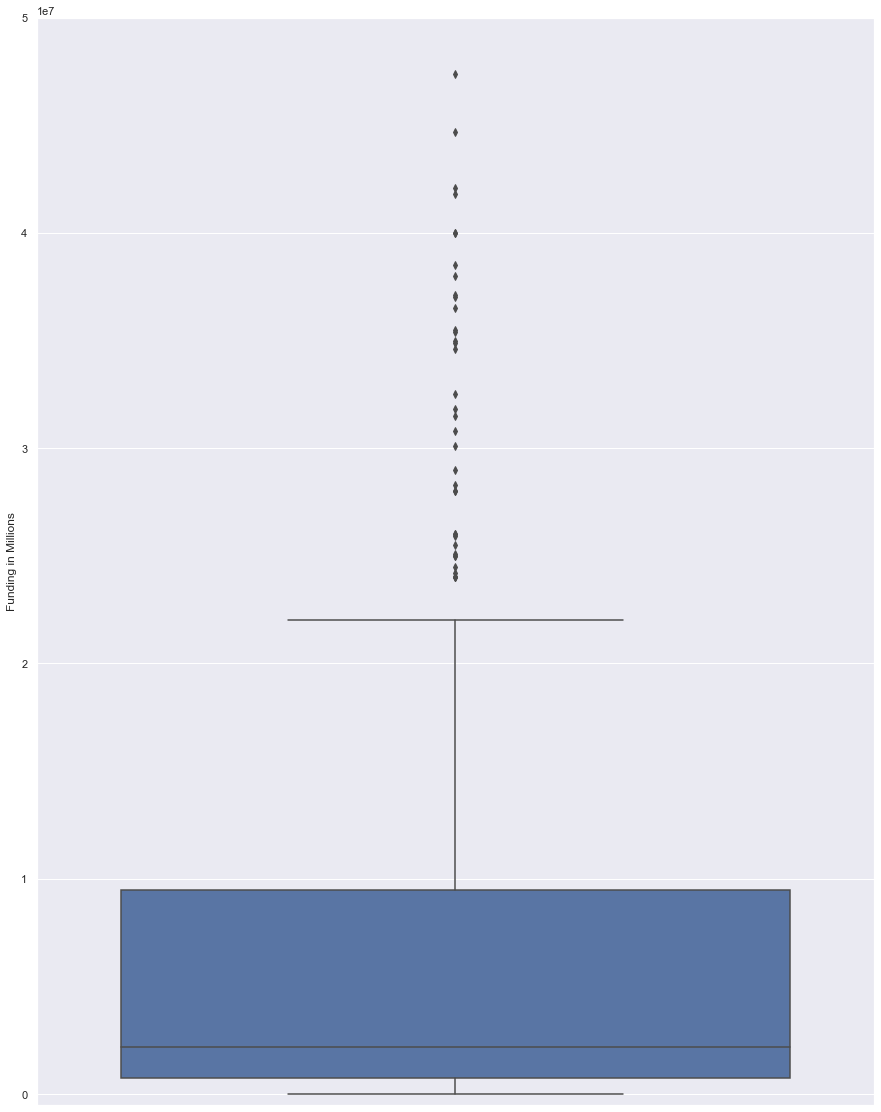

In [287]:
#Plot box plot for funds in million.

plt.figure(figsize= (15,20))
sns.boxplot( y ='Funding', data = data_modified)
plt.ylim(-500000, 50000000)
plt.ylabel("Funding in Millions")


In [288]:
#• Get the lower fence from the box plot.
#lowerFence = Q1 - (1.5*iqr) 

Q1 = data_modified['Funding'].quantile(0.25)
Q3 = data_modified['Funding'].quantile(0.75)

IQR = Q3-Q1

lower_fence = Q1 - (1.5* IQR)

print("The lower fence is ", lower_fence)



The lower fence is  -12349375.0


In [289]:
#• Check number of outliers greater than upper fence.

upper_fence = Q3 + (1.5* IQR)

print("The number of outliers greater than upper fence are ", (data_modified['Funding'] > upper_fence).sum())



The number of outliers greater than upper fence are  60


In [290]:
#• Show the values that are greater than upper fence.

data_tobe_dropped = data_modified[data_modified["Funding"] > upper_fence]
data_tobe_dropped

,Startup,Product,Funding,Event,Result,OperatingState
6,8 Securities,8securities.com,2.900000e+07,Disrupt Beijing 2011,Finalist,Operating
31,Anyclip,anyclip.com,2.400000e+07,TC50 2009,Finalist,Operating
40,Artsy,artsy.net,5.090000e+07,Disrupt NYC 2010,Contestant,Operating
49,Badgeville,badgeville.com,4.000000e+07,Disrupt SF 2010,Finalist,Acquired
56,Betterment,betterment.com,2.050000e+08,Disrupt NYC 2010,Finalist,Operating
108,Clickable,clickable.com,3.250000e+07,TC40 2007,Finalist,Acquired
113,Cloudflare,cloudflare.com,1.821000e+08,Disrupt SF 2010,Runner up,Operating
128,Credit Sesame,creditsesame.com,3.540000e+07,Disrupt SF 2010,Contestant,Operating
130,CrowdFlower Inc.,crowdflower.com,3.800000e+07,TC50 2009,Contestant,Operating
132,Cubic Telecom,cubictelecom.com,3.710000e+07,TC40 2007,Contestant,Operating


In [291]:
##• Drop the values that are greater than upper fence.

data_modified2 = data_modified.drop(data_modified[data_modified["Funding"] > upper_fence].index)

print("The number of outliers greater than upper fence are ", (data_modified2['Funding'] > upper_fence).sum())



The number of outliers greater than upper fence are  0


Text(0, 0.5, 'Funding in Millions')

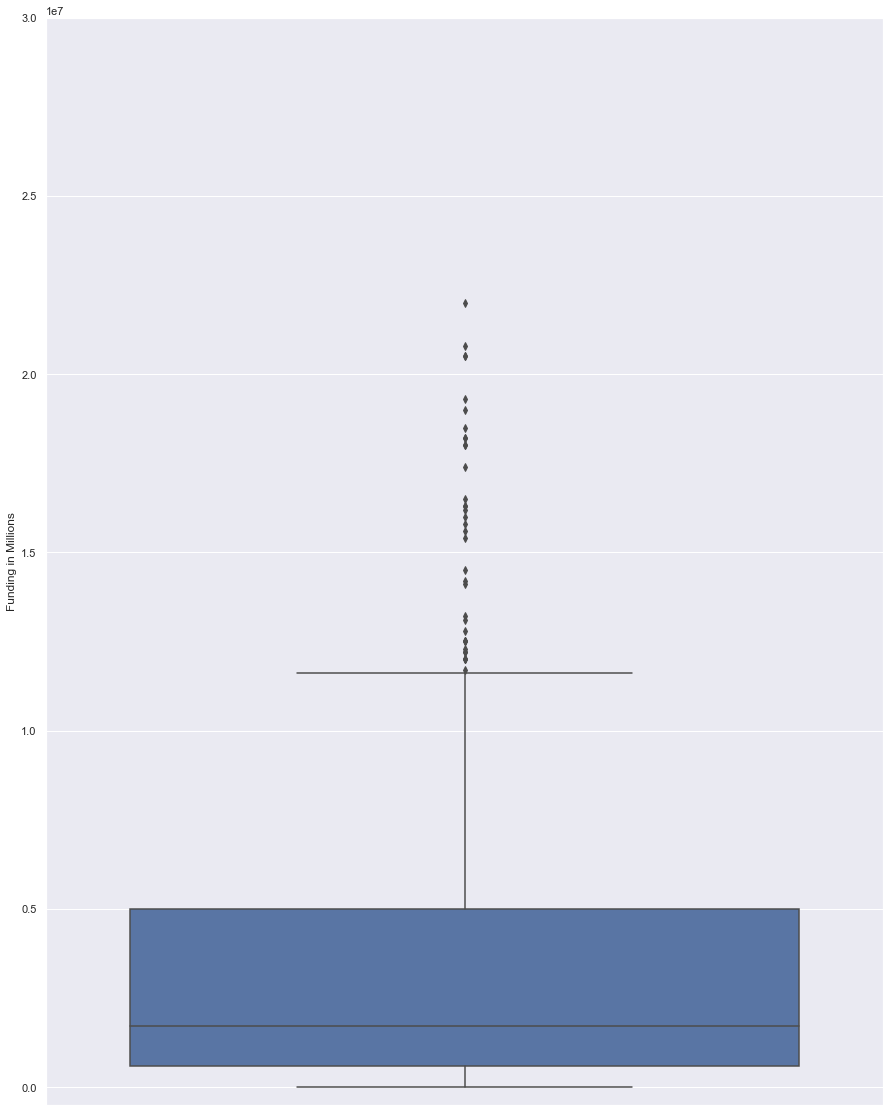

In [292]:
#• Plot the box plot after dropping the values.

plt.figure(figsize= (15,20))
sns.boxplot( y ='Funding', data = data_modified2)
plt.ylim(-500000, 30000000)
plt.ylabel("Funding in Millions")


In [293]:
#• Check frequency of the status features classes.
data_modified2['OperatingState'].value_counts()

## It seems like only 275 companies are right now in working status and the remaining are either closed or acquired

Operating    275
Closed        56
Acquired      55
Name: OperatingState, dtype: int64

Text(0.5, 0, 'Millions')

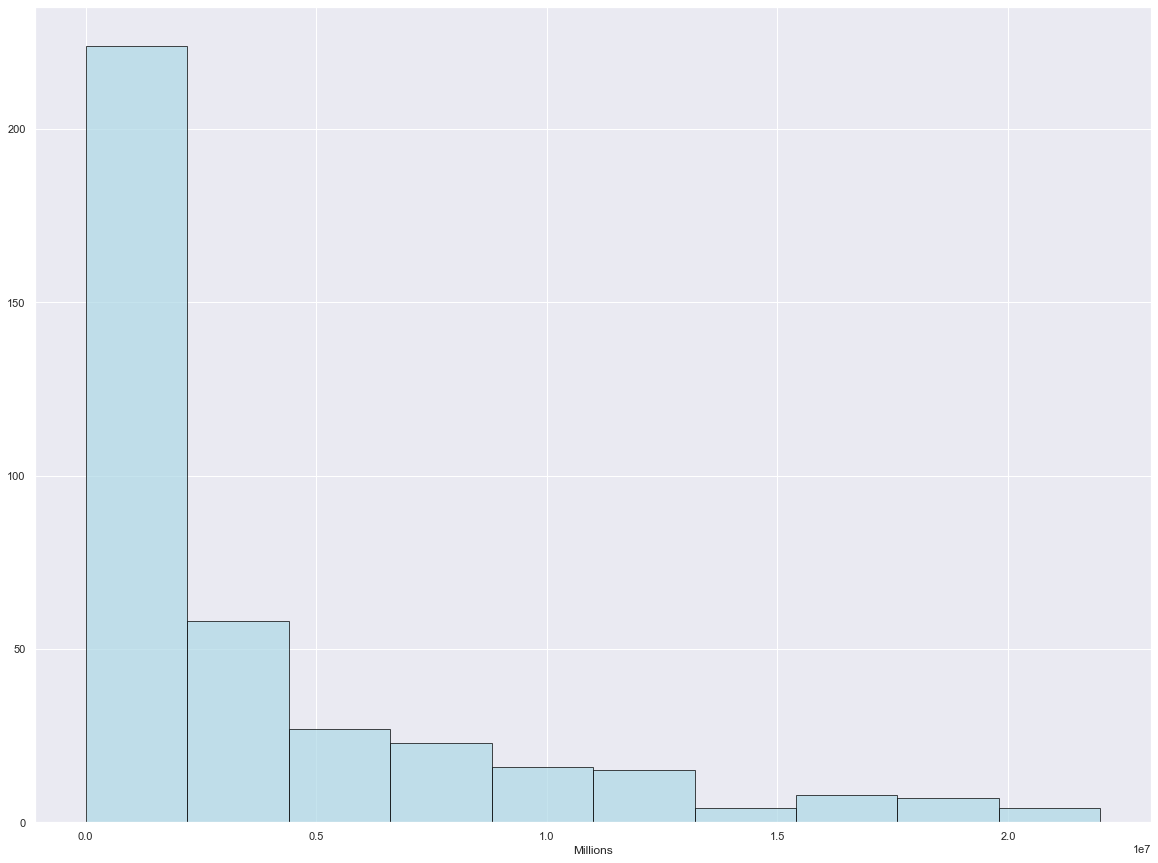

In [294]:
# • Plot a distribution plot for Funds in million.

plt.figure(figsize= (20,15))
plt.hist(data_modified2['Funding'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Millions')

(array([ 56.,   0.,   0.,   0.,   0., 275.,   0.,   0.,   0.,  55.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

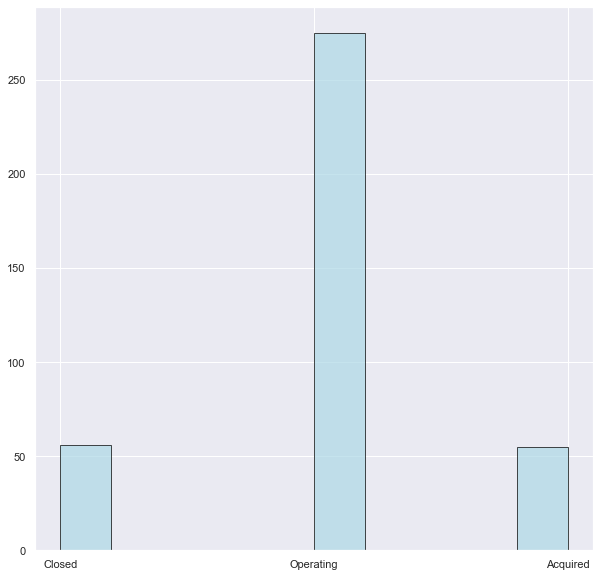

In [295]:
# • Plot distribution plots for companies still operating and companies that closed.


plt.figure(figsize= (10,10))
plt.hist(data_modified2['OperatingState'], color='lightblue', edgecolor = 'black', alpha = 0.7)


/Users/Shiva/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


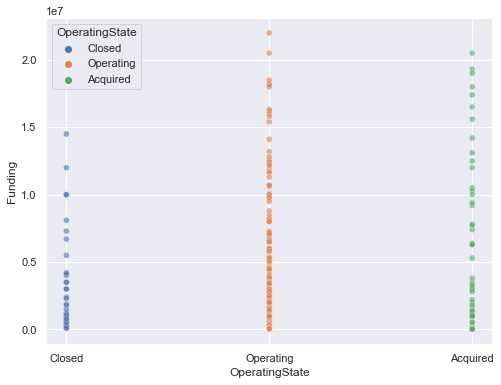

In [296]:
### 4. Statistical analysis:

## • Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down?


#Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(data_modified2.OperatingState, data_modified2.Funding,hue=data_modified2.OperatingState,alpha=0.6)
plt.show()

In [297]:
#### • Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down?
## 2 sample t-test
## H0 = 'Funds raised by companies are same'
## H1 = 'Funds raised by companies differ significantly'

Null_Hypothesis =  "Funds raised by companies are same" 
Alternative_Hypothesis =  "Funds raised by companies differ significantly"

operatingFunds = data_modified2[data_modified2['OperatingState']=='Operating']['Funding']
closedFunds = data_modified2[(data_modified2['OperatingState']=='Closed')]['Funding']

t_statistics, p_value = stats.ttest_ind(operatingFunds, closedFunds)
print('P Value', p_value)
print('P t_statistics', t_statistics)


if p_value < 0.05 :
  print("Reject the Null hypothesis i.e. {} ". format(Alternative_Hypothesis))
else:
  print("Fail to reject the Null hypothesis i.e. {} ". format(Null_Hypothesis))



P Value 0.19317471688268645
P t_statistics 1.3039132895334582
Fail to reject the Null hypothesis i.e. Funds raised by companies are same 


In [298]:
## • Make a copy of the original data frame.

data_copy = data.copy()
data_copy.head()
data_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


<AxesSubplot:>

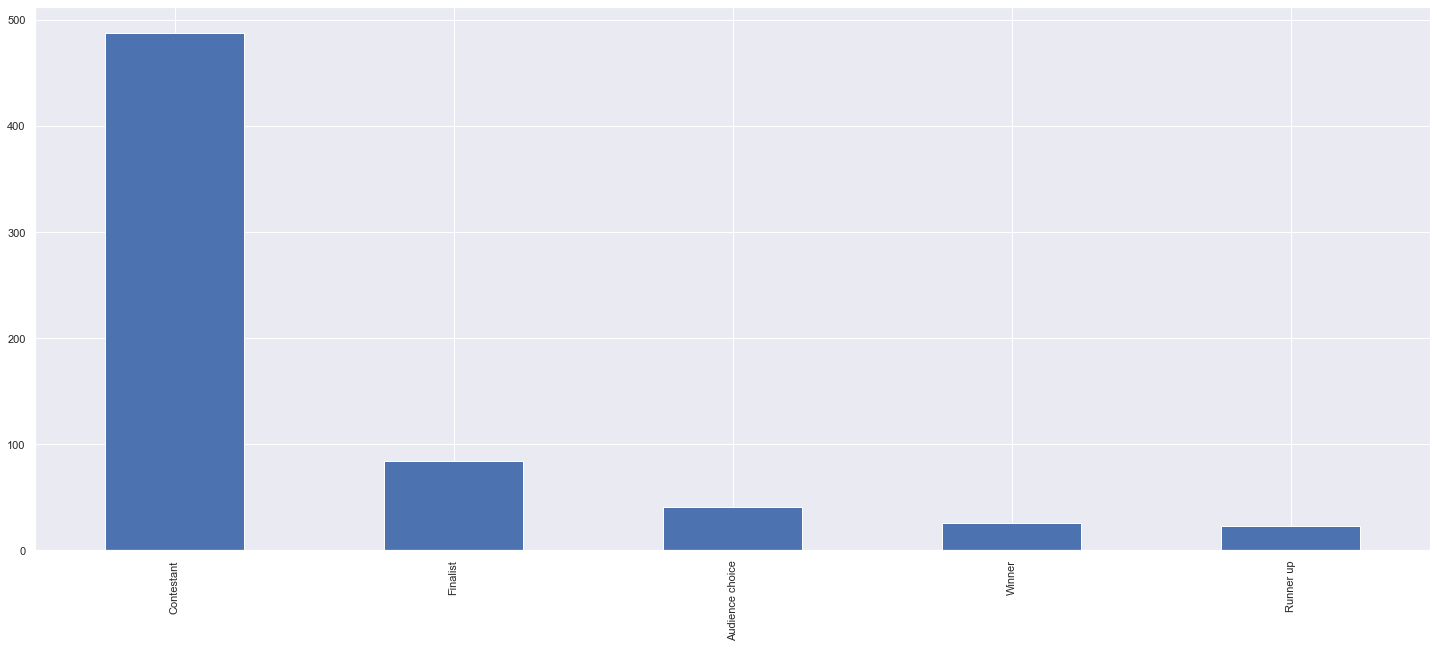

In [305]:
## • Check frequency distribution of outcome variable.

fig, ax = plt.subplots(figsize=(25,10))
data_copy['Result'].value_counts().plot(ax=ax, kind='bar')


<AxesSubplot:>

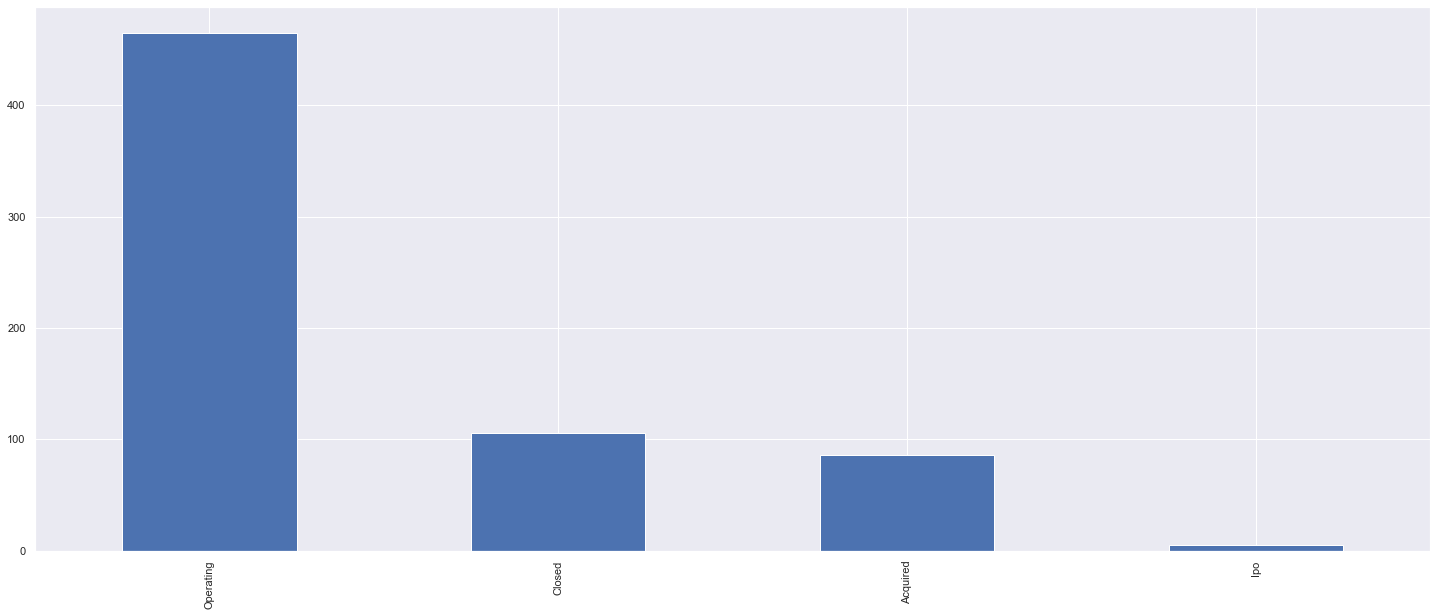

In [306]:
fig, ax = plt.subplots(figsize=(25,10))

data_copy['OperatingState'].value_counts().plot(ax=ax, kind='bar')


In [307]:
## • Calculate percentage of winners that are still operating and percentage of contestants that are still operating


operatingCompanies = data_copy[data_copy['OperatingState']=='Operating']

winnersCount = len(operatingCompanies[operatingCompanies['Result'] == 'Winner'])
contestantsCount = len(operatingCompanies[operatingCompanies['Result'] == 'Contestant'])

total = len(operatingCompanies)
winnersPercent = ((winnersCount/total)*100)
contestantPercent = ((contestantsCount/total)*100)


print("The number of companies operating now is ", total)
print("The percentage of companies operating and winner is ", winnersPercent)
print("The number of companies operating and contestant is ", contestantPercent)



The number of companies operating now is  465
The percentage of companies operating and winner is  4.086021505376344
The number of companies operating and contestant is  71.3978494623656


/Users/Shiva/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OperatingState', ylabel='count'>

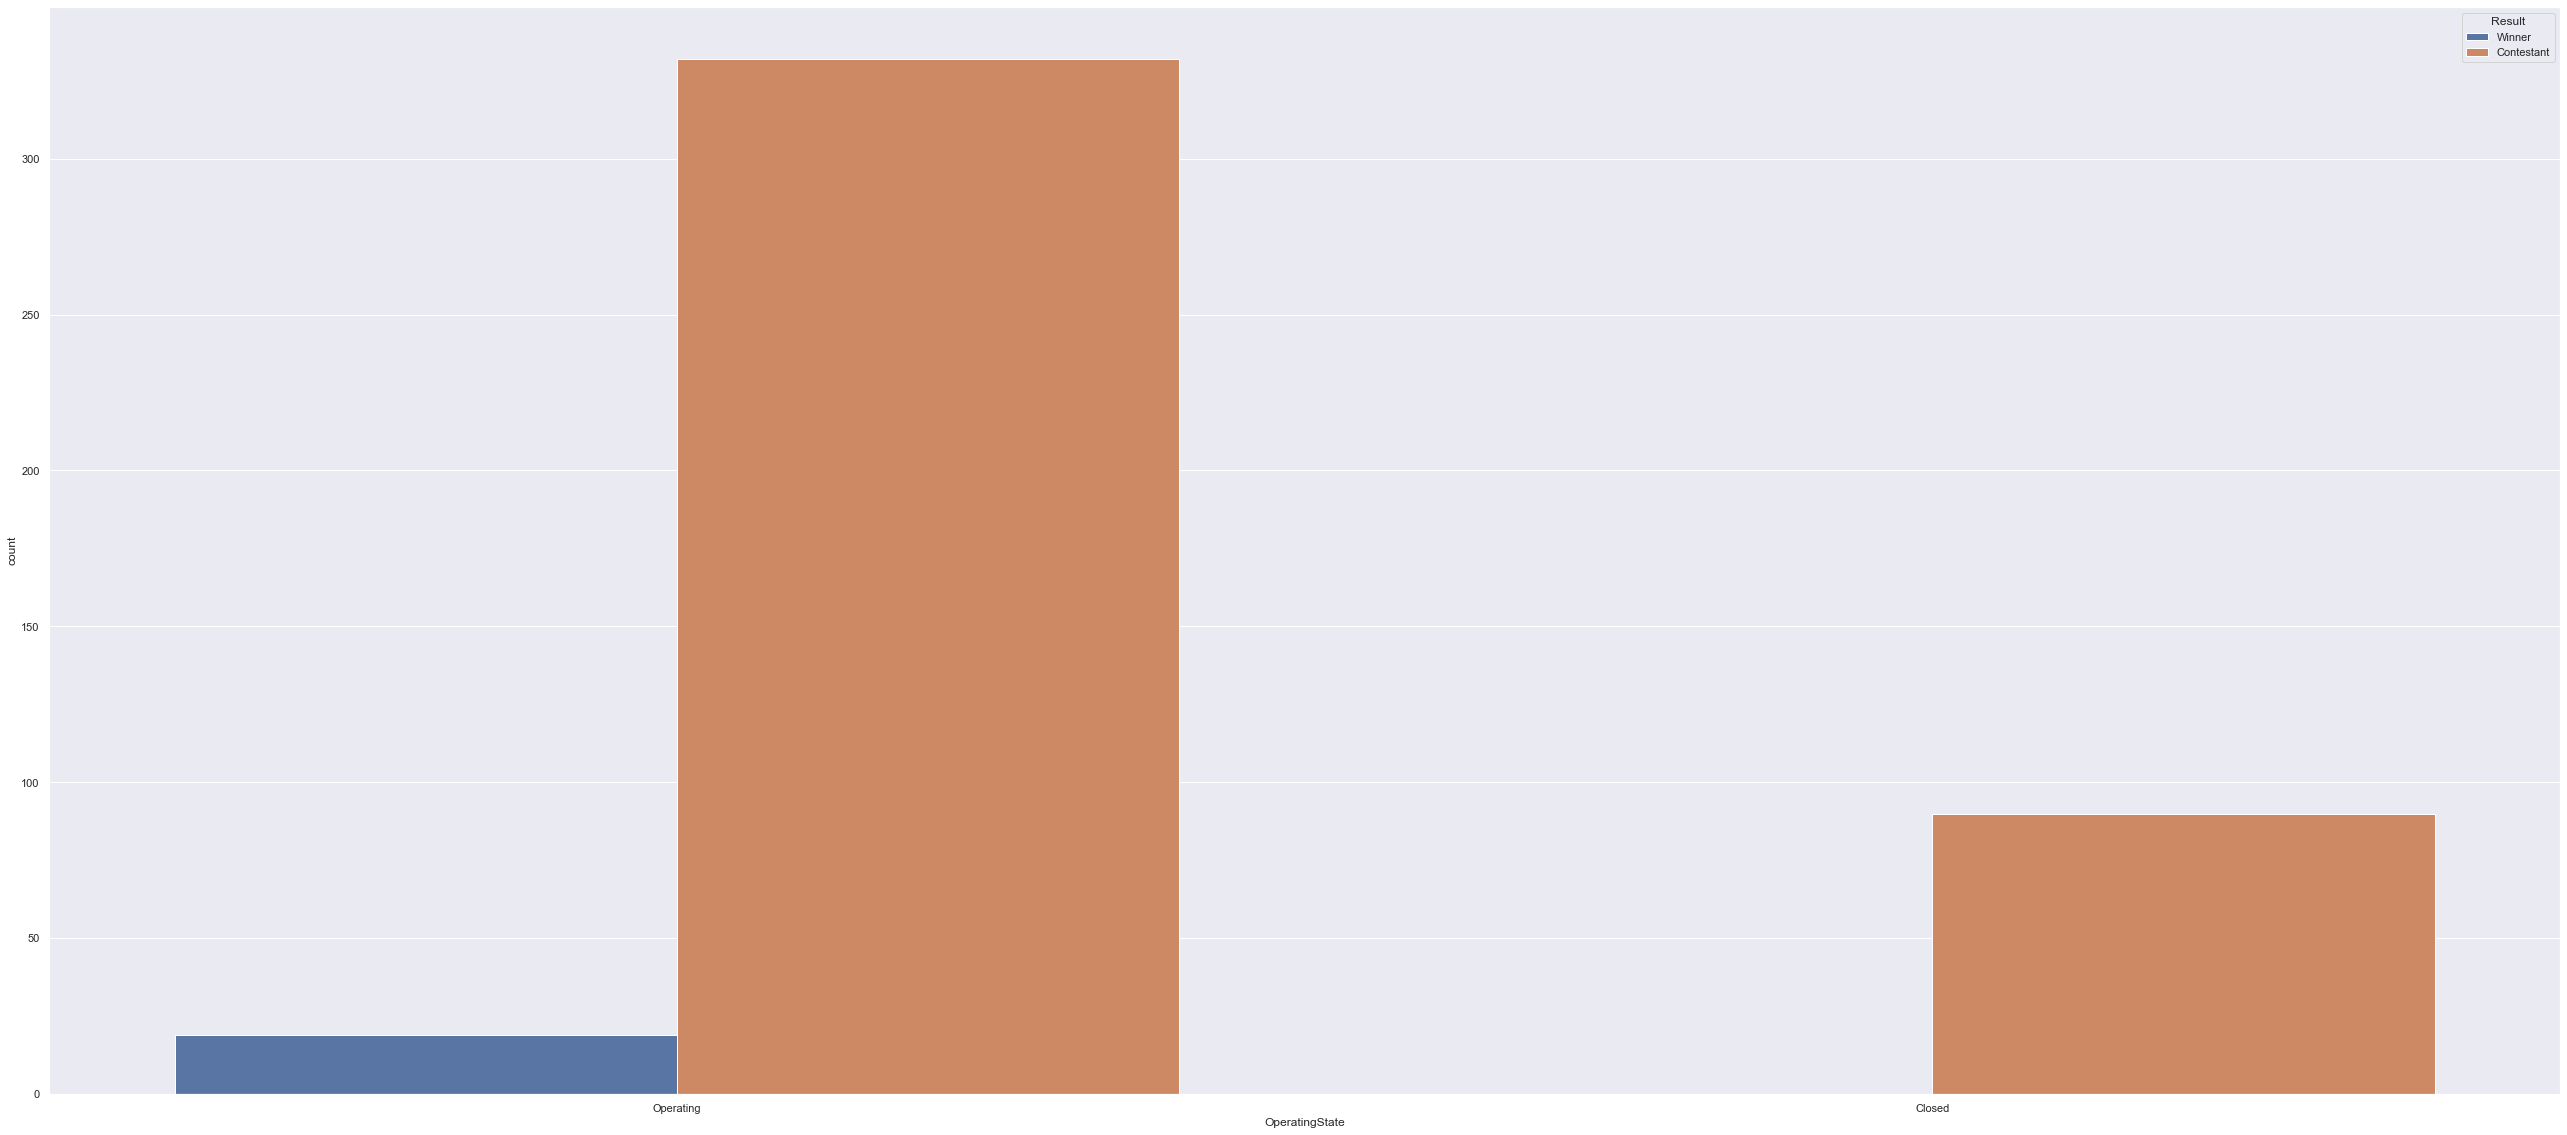

In [308]:
##• Write your hypothesis comparing the proportion of companies that are operating between winners and contestants:

operatingCompanies = data_copy[(data_copy['OperatingState']=='Operating') | (data_copy['OperatingState']=='Closed')]

winnersCo = operatingCompanies[operatingCompanies['Result'] == 'Winner']
contestantCo = operatingCompanies[operatingCompanies['Result'] == 'Contestant']


frames = [winnersCo, contestantCo]
data_modified3 = pd.concat(frames)

sns.countplot(data_modified3['OperatingState'], hue= data_modified3['Result'])

In [309]:
data_crosstab = pd.crosstab(data_modified3['OperatingState'], data_modified3['Result'], margins = True)
data_crosstab

Result,Contestant,Winner,All
OperatingState,,,
Closed,90,0,90
Operating,332,19,351
All,422,19,441


In [310]:
##  2 sample Chi square test for Hypothesis Testing 

Null_Hypotheis = "Proportion of companies are same between winners and contestants."
Alternate_hypotheis ="Proportion of companies are differnt between winners and contestants."

data_crosstab = pd.crosstab(data_modified3['OperatingState'],data_modified3['Result'],margins = False)

chi, p_value , dof, expected =  stats.chi2_contingency(data_crosstab)
print('P Value', p_value)


if p_value < 0.05 :
  print("Reject the Null hypothesis i.e. {} ". format(Alternate_hypotheis))
else:
  print("Fail to reject the Null hypothesis i.e. {} ". format(Null_Hypotheis))

P Value 0.04936743002550657
Reject the Null hypothesis i.e. Proportion of companies are differnt between winners and contestants. 


/Users/Shiva/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Event', ylabel='count'>

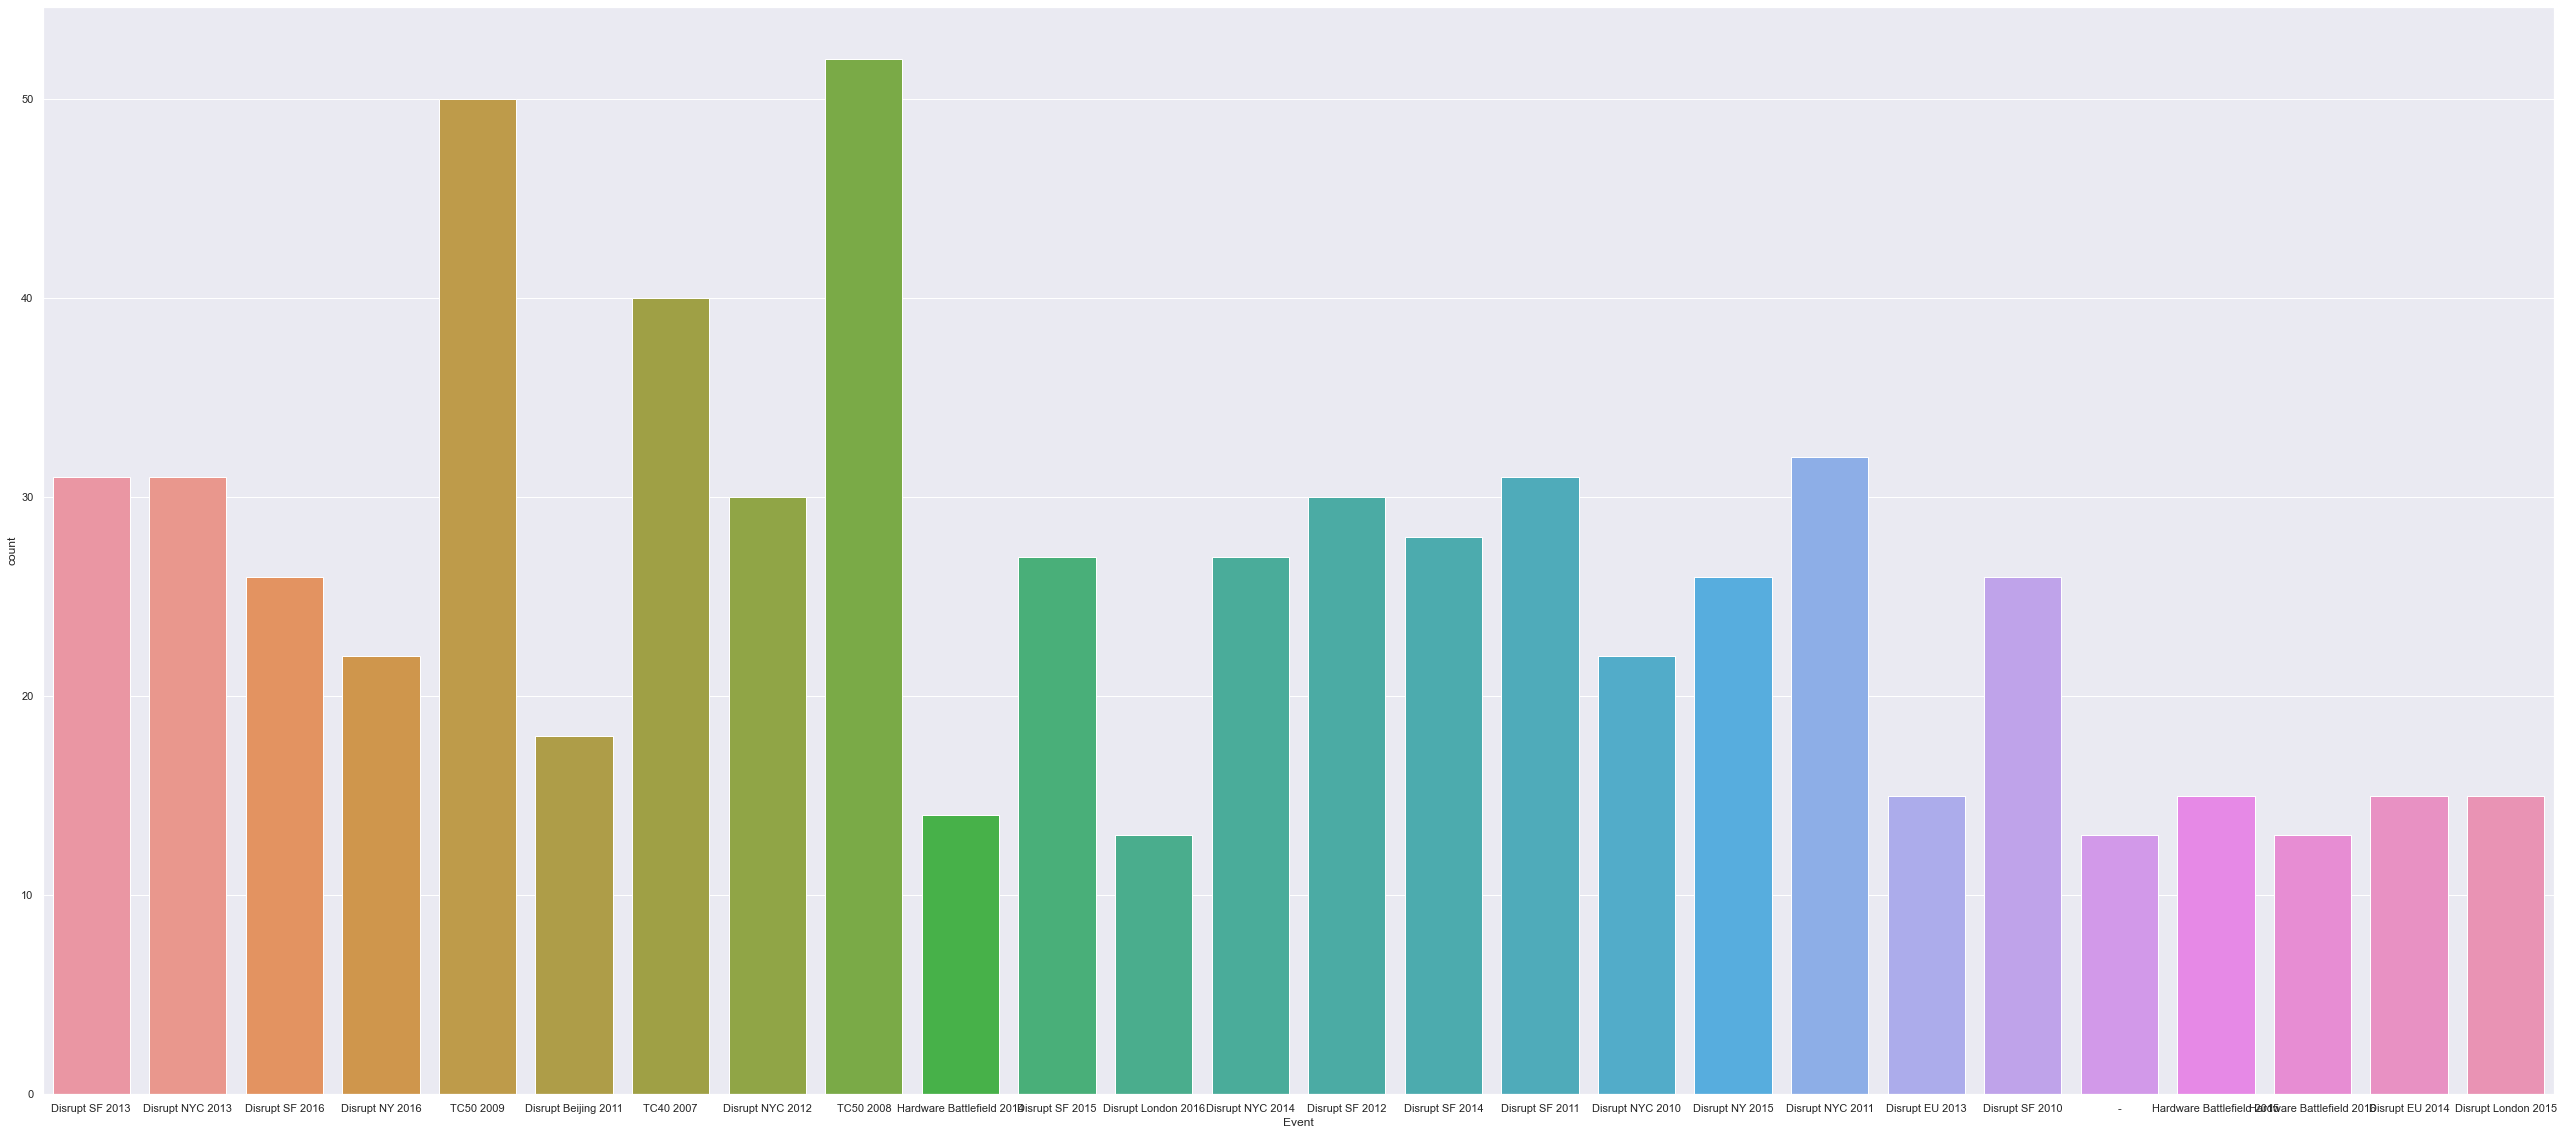

In [141]:
## • Check distribution of the Event variable.
sns.set(rc={'figure.figsize':(45,20)})
sns.countplot(data['Event'])

In [261]:
## • Select only the Event that has disrupt keyword from 2013 onwards.

disrupt2013 = data[(data['Event'].str.contains('disrupt', regex=False, case=False, na=False)) & (disrupt2013['Event'].str[-4:].astype('int64') >=2013)]

disrupt2013['Funding'] = disrupt2013['Funding'].str.replace('$', '')
disrupt2013['Funding'] = disrupt2013['Funding'].apply(value_to_float)
disrupt2013['Funding'] = disrupt2013['Funding'].fillna(0)

disrupt2013


<ipython-input-261-dad06f7c9e4c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disrupt2013['Funding'] = disrupt2013['Funding'].str.replace('$', '')
<ipython-input-261-dad06f7c9e4c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disrupt2013['Funding'] = disrupt2013['Funding'].apply(value_to_float)
<ipython-input-261-dad06f7c9e4c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,0.0,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,630000.0,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,0.0,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,1000000.0,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,0.0,Disrupt NYC 2013,Contestant,Operating
...,...,...,...,...,...,...
646,YayPay Inc,yaypay.com,900000.0,Disrupt London 2015,Contestant,Operating
648,YOOBIC,yoobic.com,0.0,Disrupt London 2015,Finalist,Operating
653,ZAP!,zapreklam.com/,0.0,Disrupt EU 2014,Audience choice,Operating
656,Zenefits,zenefits.com,583600000.0,Disrupt NYC 2013,Finalist,Operating


In [262]:
## • Write and perform your hypothesis along with significance test comparing the funds raised by companies across NY, SF and EU events from
##2013 onwards.

NY2013 = disrupt2013[(disrupt2013['Event'].str.contains('\\bNY\\b')) | (disrupt2013['Event'].str.contains('EU', regex=False, case=False, na=False)) | (disrupt2013['Event'].str.contains('SF', regex=False, case=False, na=False))]

NY2013.head(25)


,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,0.0,Disrupt SF 2013,Contestant,Operating
2,3DPrinterOS,3dprinteros.com,0.0,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,1000000.0,Disrupt NY 2016,Audience choice,Operating
13,Agrilyst,agrilyst.com,1000000.0,Disrupt SF 2015,Winner,Operating
16,Aircall,aircall.io,11600000.0,Disrupt SF 2015,Contestant,Operating
23,Allre,allre.com,0.0,Disrupt SF 2014,Contestant,Acquired
25,Altwork,altwork.com,0.0,Disrupt SF 2016,Audience choice,Operating
26,Amaryllis Nucleics,amaryllisnucleics.com,0.0,Disrupt SF 2016,Contestant,Operating
30,Ansa,ansa.com,0.0,Disrupt SF 2013,Contestant,Operating
36,Arctuition,arcsiteapp.com,0.0,Disrupt NY 2015,Contestant,Operating


/Users/Shiva/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Shiva/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Shiva/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

Text(0.5, 0, 'SF Funding')

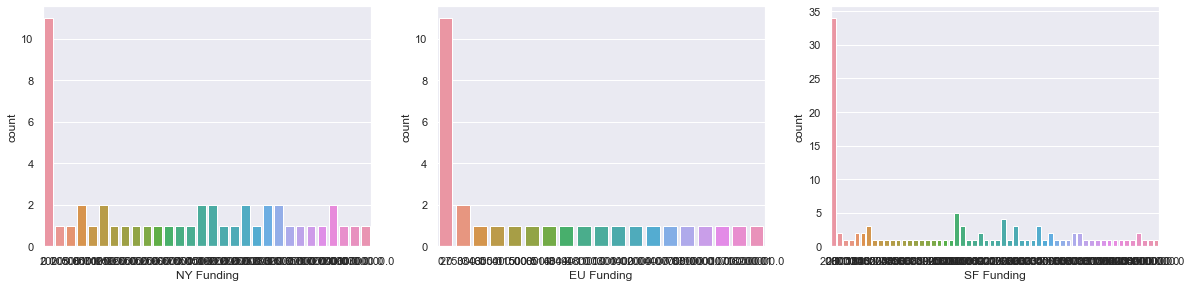

In [273]:
#sns.countplot(NY2013['Event'], hue = NY2013['Funding'])
plt.figure(figsize= (20,15))

plt.subplot(3,3,1)
sns.countplot(NY2013[NY2013['Event'].str.contains('\\bNY\\b')]['Funding'])
plt.xlabel('NY Funding')

plt.subplot(3,3,2)
sns.countplot(NY2013[NY2013['Event'].str.contains('\\bEU\\b')]['Funding'])
plt.xlabel('EU Funding')

plt.subplot(3,3,3)
sns.countplot(NY2013[NY2013['Event'].str.contains('\\bSF\\b')]['Funding'])
plt.xlabel('SF Funding')

In [278]:
## Will do one-way ANOVA test for this

Null_Hypotheis = "There is no significant difference in Funds collected among the groups"
Alternate_hypotheis ="There is significant difference in Funds collected among the groups"


nyEvent = NY2013[NY2013['Event'].str.contains('\\bNY\\b')]['Funding']
euEvent = NY2013[NY2013['Event'].str.contains('\\bEU\\b')]['Funding']
sfEvent = NY2013[NY2013['Event'].str.contains('\\bSF\\b')]['Funding']

f, p_value = stats.f_oneway(nyEvent, euEvent, sfEvent)
print('P_value', p_value)

if p_value < 0.05 :
  print("Reject the Null hypothesis i.e. {} ". format(Alternate_hypotheis))
else:
  print("Fail to reject the Null hypothesis i.e. {} ". format(Null_Hypotheis))




P_value 0.5587181203949689
Fail to reject the Null hypothesis i.e. There is no significant difference in Funds collected among the groups 


/Users/Shiva/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Event', ylabel='count'>

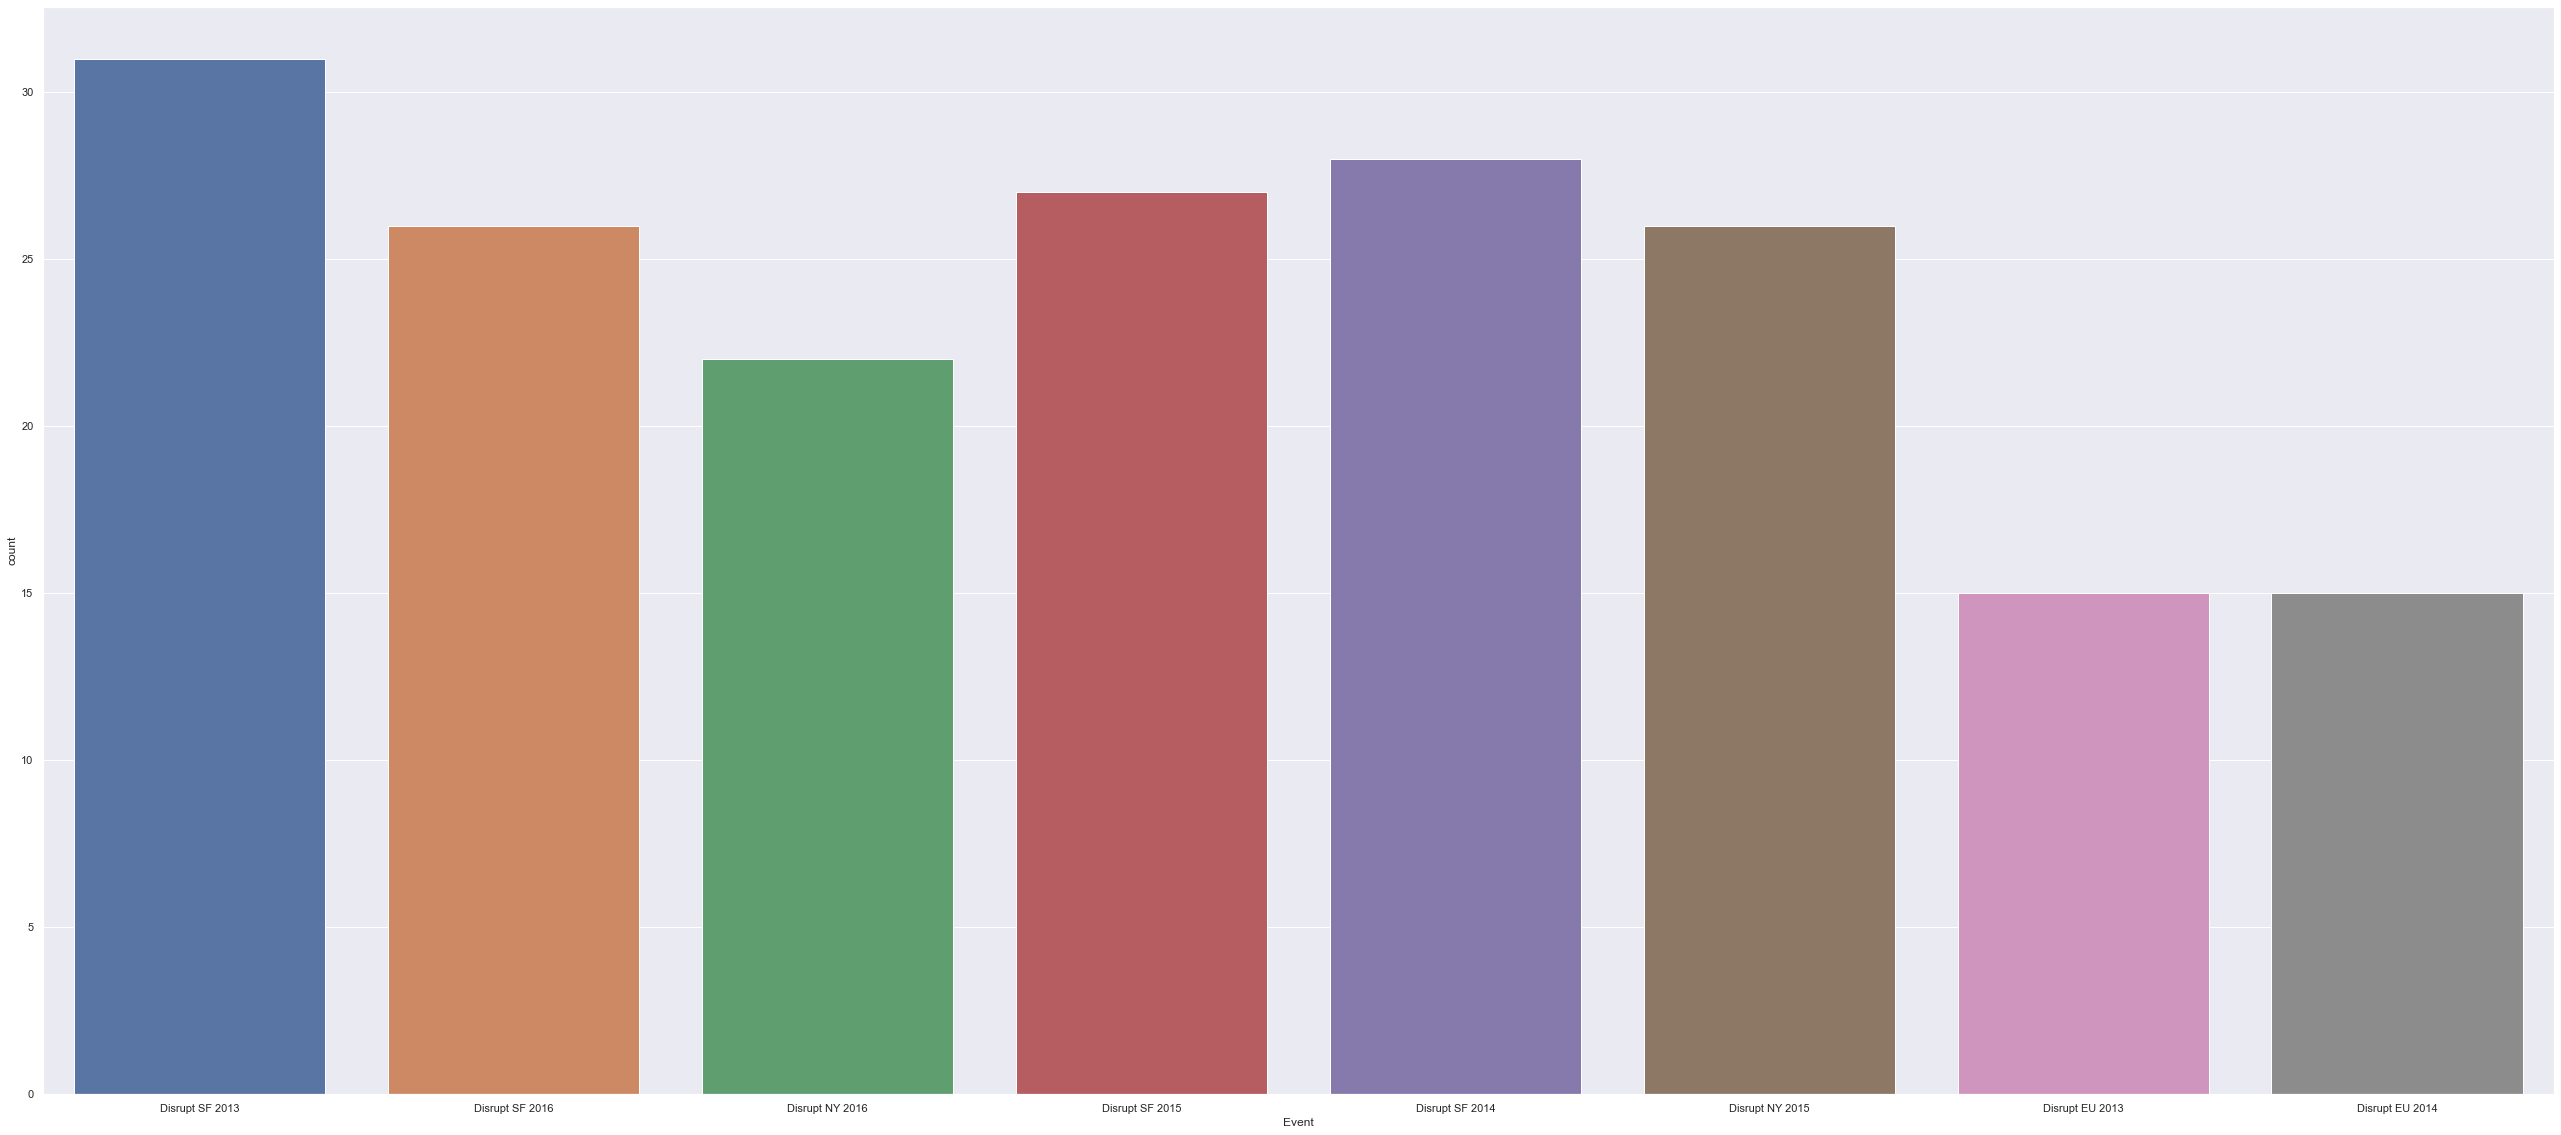

In [228]:
##• Plot the distribution plot comparing the 3 city events.

sns.countplot(NY2013['Event'])

In [ ]:
##Write your observations on improvements or suggestions on quality, quantity, variety, velocity, veracity etc. on the data points collected to perform a better data analysis.

In [ ]:
## 1.  The funding could be properly recorded.  Its the database for fund raising events, and the funds are missing 
##     for a lot of companies.

## 2.  The year of event could have been captured in a separate column, which would have made it easier to read and 
##     to calculate too.  

##3.  Many of companies don't have the event name and year captured.  
